# 基礎查詢練習

In [4]:
# 讀取 HDFS 上資料
RawUserRDD= sc.textFile("hdfs:///Kevin/u.user")

In [5]:
# 查看筆數
RawUserRDD.count()

943

In [6]:
# 查看前五筆資料
RawUserRDD.take(5)

['1|24|M|technician|85711',
 '2|53|F|other|94043',
 '3|23|M|writer|32067',
 '4|24|M|technician|43537',
 '5|33|F|other|15213']

In [7]:
# 以 "|" 符號，取得每一個欄位
userRDD =RawUserRDD.map(lambda line: line.split("|"))
userRDD.take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

# 建立DataFrame

In [8]:
# 匯入 SQLContext 模組
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [9]:
# 定義 DataFrame 的每一個欄位名稱與資料型態
from pyspark.sql import Row
user_Rows = userRDD.map(lambda p:
     Row(
         userid=int(p[0]), 
         age=int(p[1]),
         gender=p[2],
         occupation=p[3],
         zipcode=p[4]
    )
)
user_Rows.take(5)

[Row(age=24, gender='M', occupation='technician', userid=1, zipcode='85711'),
 Row(age=53, gender='F', occupation='other', userid=2, zipcode='94043'),
 Row(age=23, gender='M', occupation='writer', userid=3, zipcode='32067'),
 Row(age=24, gender='M', occupation='technician', userid=4, zipcode='43537'),
 Row(age=33, gender='F', occupation='other', userid=5, zipcode='15213')]

In [10]:
# 建立 DataFrame
user_df = sqlContext.createDataFrame(user_Rows)
user_df.printSchema()

root
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- userid: long (nullable = true)
 |-- zipcode: string (nullable = true)



In [11]:
# 查看前五筆資料
user_df.show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
+---+------+----------+------+-------+
only showing top 5 rows



In [12]:
# 幫 DataFrame 建立別名
df=user_df.alias("df")
df.show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
+---+------+----------+------+-------+
only showing top 5 rows



In [13]:
# 建立 Spark SQL tempTable
user_df.registerTempTable("user_table")

In [14]:
# 可以下 SQL 語法，顯示有 943 筆資料
sqlContext.sql(" SELECT count(*) counts FROM user_table").show()

+------+
|counts|
+------+
|   943|
+------+



In [15]:
# 用 三個引號包住 SQL 語法
sqlContext.sql("""
SELECT count(*) counts 
FROM   user_table
""").show()

+------+
|counts|
+------+
|   943|
+------+



In [16]:
# 顯示前 20 筆資料
sqlContext.sql(" SELECT *  FROM user_table ").show()

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 24|     M|   technician|     1|  85711|
| 53|     F|        other|     2|  94043|
| 23|     M|       writer|     3|  32067|
| 24|     M|   technician|     4|  43537|
| 33|     F|        other|     5|  15213|
| 42|     M|    executive|     6|  98101|
| 57|     M|administrator|     7|  91344|
| 36|     M|administrator|     8|  05201|
| 29|     M|      student|     9|  01002|
| 53|     M|       lawyer|    10|  90703|
| 39|     F|        other|    11|  30329|
| 28|     F|        other|    12|  06405|
| 47|     M|     educator|    13|  29206|
| 45|     M|    scientist|    14|  55106|
| 49|     F|     educator|    15|  97301|
| 21|     M|entertainment|    16|  10309|
| 30|     M|   programmer|    17|  06355|
| 35|     F|        other|    18|  37212|
| 40|     M|    librarian|    19|  02138|
| 42|     F|    homemaker|    20|  95660|
+---+------+-------------+------+-

In [17]:
# 顯示前 5 筆資料
sqlContext.sql(" SELECT *  FROM user_table").show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
+---+------+----------+------+-------+
only showing top 5 rows



In [18]:
# LIMIT 5 顯示前 5 筆資料
sqlContext.sql(" SELECT *  FROM user_table LIMIT 5").show()

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
+---+------+----------+------+-------+



# 顯示部分欄位

In [19]:
# 只要顯示 '1', 'technician', 'M', '24' 等
userRDDnew= userRDD.map(lambda x: (x[0],x[3],x[2] ,x[1]) )
userRDDnew.take(5)

[('1', 'technician', 'M', '24'),
 ('2', 'other', 'F', '53'),
 ('3', 'writer', 'M', '23'),
 ('4', 'technician', 'M', '24'),
 ('5', 'other', 'F', '33')]

In [20]:
# 選取顯示欄位，取前五筆
user_df.select("userid","occupation","gender","age").show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [21]:
# 也可以 dataframe 名稱.欄位名稱 選取，取前五筆
user_df.select(user_df.userid, user_df.occupation,user_df.gender,user_df.age).show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [22]:
# dataframe 別名.欄位名稱 選取，取前五筆
df.select(df.userid,df.occupation,df.gender,df.age).show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [23]:
# 混合 dataframe 名稱.欄位名稱 或 dataframe 別名.欄位名稱 選取，取前五筆
user_df.select(user_df.userid, user_df.occupation,df.gender,df.age).show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [24]:
# 使用 select 關鍵字，指定想要顯示的欄位
sqlContext.sql("SELECT userid,occupation,gender,age FROM user_table").show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [25]:
# 增加計算欄位
# 計算出生年並顯示出來
userRDDnew= userRDD.map(lambda x: (x[0],x[3],x[2],x[1] ,2016-int(x[1])) )
userRDDnew.take(5)

[('1', 'technician', 'M', '24', 1992),
 ('2', 'other', 'F', '53', 1963),
 ('3', 'writer', 'M', '23', 1993),
 ('4', 'technician', 'M', '24', 1992),
 ('5', 'other', 'F', '33', 1983)]

In [26]:
# 有 schema 所以可以直接輸入計算欄位
df.select("userid","occupation","gender","age",2016-df.age).show(5)

+------+----------+------+---+------------+
|userid|occupation|gender|age|(2016 - age)|
+------+----------+------+---+------------+
|     1|technician|     M| 24|        1992|
|     2|     other|     F| 53|        1963|
|     3|    writer|     M| 23|        1993|
|     4|technician|     M| 24|        1992|
|     5|     other|     F| 33|        1983|
+------+----------+------+---+------------+
only showing top 5 rows



In [27]:
# 為計算欄位取一個別名
df.select("userid","occupation","gender","age",(2016-df.age).alias("birthyear")).show(5)

+------+----------+------+---+---------+
|userid|occupation|gender|age|birthyear|
+------+----------+------+---+---------+
|     1|technician|     M| 24|     1992|
|     2|     other|     F| 53|     1963|
|     3|    writer|     M| 23|     1993|
|     4|technician|     M| 24|     1992|
|     5|     other|     F| 33|     1983|
+------+----------+------+---+---------+
only showing top 5 rows



In [28]:
# 2016-age birthyear, 計算生日年
sqlContext.sql("""
SELECT userid,occupation,gender,age,2016-age birthyear 
FROM user_table""").show(5)

+------+----------+------+---+---------+
|userid|occupation|gender|age|birthyear|
+------+----------+------+---+---------+
|     1|technician|     M| 24|     1992|
|     2|     other|     F| 53|     1963|
|     3|    writer|     M| 23|     1993|
|     4|technician|     M| 24|     1992|
|     5|     other|     F| 33|     1983|
+------+----------+------+---+---------+
only showing top 5 rows



In [29]:
# 篩選 r[3]=='technician' and r[2]=='M' and r[1]=='24'
userRDD.filter(lambda r: r[3]=='technician' and r[2]=='M' and r[1]=='24').take(6) 

[['1', '24', 'M', 'technician', '85711'],
 ['4', '24', 'M', 'technician', '43537'],
 ['456', '24', 'M', 'technician', '31820'],
 ['717', '24', 'M', 'technician', '84105'],
 ['832', '24', 'M', 'technician', '77042'],
 ['889', '24', 'M', 'technician', '78704']]

In [30]:
# 多個 filter 代表 and 意思
user_df.filter("occupation='technician' ").filter("gender='M' ").filter("age=24").show()

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
| 24|     M|technician|   889|  78704|
+---+------+----------+------+-------+



In [31]:
# 使用單一 filter 篩選
user_df.filter("occupation='technician' and gender='M' and age=24").show()

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
| 24|     M|technician|   889|  78704|
+---+------+----------+------+-------+



In [32]:
# 也可以使用 dataframe 名稱.欄位名稱篩選，但要用 & 連接
df.filter((df.occupation=='technician' ) & (df.gender=='M' ) & (df.age==24)).show()

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
| 24|     M|technician|   889|  78704|
+---+------+----------+------+-------+



In [33]:
# 也可以使用中括弧篩選
df.filter((df['occupation']=='technician' ) & (df['gender']=='M' ) & (df['age']==24)).show()

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
| 24|     M|technician|   889|  78704|
+---+------+----------+------+-------+



In [34]:
#Step3 使用Spark SQL 篩選資料
# where 篩選資料
sqlContext.sql(
'''SELECT *  
FROM user_table 
where occupation='technician' and   gender='M' and age=24''').show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
+---+------+----------+------+-------+
only showing top 5 rows



In [35]:
# 單一欄位排序資料
# 年紀由小排到大
userRDD.takeOrdered(5, key = lambda x: int(x[1]))

[['30', '7', 'M', 'student', '55436'],
 ['471', '10', 'M', 'student', '77459'],
 ['289', '11', 'M', 'none', '94619'],
 ['142', '13', 'M', 'other', '48118'],
 ['609', '13', 'F', 'student', '55106']]

In [36]:
# 年紀由大排到小
userRDD.takeOrdered(5, key = lambda x: -1*int(x[1]))

[['481', '73', 'M', 'retired', '37771'],
 ['767', '70', 'M', 'engineer', '00000'],
 ['803', '70', 'M', 'administrator', '78212'],
 ['860', '70', 'F', 'retired', '48322'],
 ['559', '69', 'M', 'executive', '10022']]

In [37]:
# 使用 ORDER BY 升冪 預設
sqlContext.sql("""
SELECT userid,occupation,gender,age   
FROM user_table 
ORDER BY age""").show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|    30|   student|     M|  7|
|   471|   student|     M| 10|
|   289|      none|     M| 11|
|   142|     other|     M| 13|
|   609|   student|     F| 13|
+------+----------+------+---+
only showing top 5 rows



In [38]:
# 使用 ORDER BY 降冪
sqlContext.sql("""
SELECT userid,occupation,gender,age   
FROM user_table 
ORDER BY age DESC""").show(5)

+------+-------------+------+---+
|userid|   occupation|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   860|      retired|     F| 70|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



In [39]:
# 使用 ORDER BY 升冪 預設
user_df.select("userid","occupation","gender","age").orderBy("age").show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|    30|   student|     M|  7|
|   471|   student|     M| 10|
|   289|      none|     M| 11|
|   142|     other|     M| 13|
|   609|   student|     F| 13|
+------+----------+------+---+
only showing top 5 rows



In [40]:
# age-降冪
df.select("userid","occupation","gender","age").orderBy("age",ascending=0).show(5)

+------+-------------+------+---+
|userid|   occupation|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   767|     engineer|     M| 70|
|   860|      retired|     F| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



In [41]:
# age-升冪
df.select("userid","occupation","gender","age").orderBy(df.age).show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|    30|   student|     M|  7|
|   471|   student|     M| 10|
|   289|      none|     M| 11|
|   142|     other|     M| 13|
|   609|   student|     F| 13|
+------+----------+------+---+
only showing top 5 rows



In [42]:
# age-降冪
df.select("userid","occupation","gender","age").orderBy(df.age.desc()).show(5)

+------+-------------+------+---+
|userid|   occupation|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   860|      retired|     F| 70|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



In [43]:
# 多欄位排序資料
# 指定排序欄位 age-降冪, gender 性別-升冪
userRDD.takeOrdered(5, key = lambda x: (-int(x[1]), x[2]))

[['481', '73', 'M', 'retired', '37771'],
 ['860', '70', 'F', 'retired', '48322'],
 ['767', '70', 'M', 'engineer', '00000'],
 ['803', '70', 'M', 'administrator', '78212'],
 ['559', '69', 'M', 'executive', '10022']]

In [44]:
# age-降冪, gender 性別-升冪
sqlContext.sql("""
SELECT userid, age, gender,occupation,zipcode
FROM user_table
ORDER BY age DESC,gender """).show(5)

+------+---+------+-------------+-------+
|userid|age|gender|   occupation|zipcode|
+------+---+------+-------------+-------+
|   481| 73|     M|      retired|  37771|
|   860| 70|     F|      retired|  48322|
|   803| 70|     M|administrator|  78212|
|   767| 70|     M|     engineer|  00000|
|   559| 69|     M|    executive|  10022|
+------+---+------+-------------+-------+
only showing top 5 rows



In [45]:
# 0-升冪, 1-降冪
df.orderBy(["age","gender"],ascending=[0,1]).show(5)

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 73|     M|      retired|   481|  37771|
| 70|     F|      retired|   860|  48322|
| 70|     M|administrator|   803|  78212|
| 70|     M|     engineer|   767|  00000|
| 69|     M|    executive|   559|  10022|
+---+------+-------------+------+-------+
only showing top 5 rows



In [46]:
# age-降冪, gender-升冪
df.orderBy(df.age.desc(),df.gender).show(5)

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 73|     M|      retired|   481|  37771|
| 70|     F|      retired|   860|  48322|
| 70|     M|     engineer|   767|  00000|
| 70|     M|administrator|   803|  78212|
| 69|     M|    executive|   559|  10022|
+---+------+-------------+------+-------+
only showing top 5 rows



In [47]:
# 顯示不重複資料
# In[54]:
userRDD.map(lambda x:x[2]).distinct().collect()

['M', 'F']

In [48]:
# 年紀+性別 不重複
userRDD.map(lambda x:(x[1],x[2])).distinct().take(20)

[('42', 'F'),
 ('27', 'F'),
 ('49', 'M'),
 ('15', 'M'),
 ('39', 'M'),
 ('46', 'M'),
 ('30', 'M'),
 ('55', 'F'),
 ('36', 'M'),
 ('41', 'F'),
 ('52', 'F'),
 ('37', 'M'),
 ('49', 'F'),
 ('11', 'M'),
 ('31', 'F'),
 ('30', 'F'),
 ('18', 'M'),
 ('35', 'M'),
 ('39', 'F'),
 ('36', 'F')]

In [49]:
# SELECT 不重複指令 distinct
sqlContext.sql("SELECT distinct gender FROM user_table").show()

+------+
|gender|
+------+
|     F|
|     M|
+------+



In [50]:
# SELECT 年紀+性別 不重複指令 distinct
sqlContext.sql("SELECT distinct age,gender FROM user_table").show()

+---+------+
|age|gender|
+---+------+
| 39|     F|
| 48|     M|
| 26|     M|
| 28|     M|
| 54|     M|
| 60|     M|
| 50|     M|
| 53|     F|
| 30|     M|
| 48|     F|
| 47|     M|
| 46|     M|
| 56|     M|
| 32|     M|
| 31|     M|
| 53|     M|
| 20|     F|
| 29|     F|
| 21|     F|
| 42|     M|
+---+------+
only showing top 20 rows



In [51]:
# 使用 dataframe 顯示性別不重複資料
df.select("gender").distinct().show()

+------+
|gender|
+------+
|     F|
|     M|
+------+



In [52]:
# 使用 dataframe 顯示年紀+性別不重複資料
df.select("age","gender").distinct().show()

+---+------+
|age|gender|
+---+------+
| 39|     F|
| 48|     M|
| 26|     M|
| 28|     M|
| 54|     M|
| 60|     M|
| 50|     M|
| 53|     F|
| 30|     M|
| 48|     F|
| 47|     M|
| 46|     M|
| 56|     M|
| 32|     M|
| 31|     M|
| 53|     M|
| 20|     F|
| 29|     F|
| 21|     F|
| 42|     M|
+---+------+
only showing top 20 rows



In [53]:
# 群組統計資料
# 依照性別統計資料
userRDD.map(lambda x: (x[2],1)).reduceByKey(lambda x,y: x+y).collect()

[('M', 670), ('F', 273)]

In [54]:
# 依照性別、職業統計資料
userRDD.map(lambda x: ((x[2],x[3]),1)).reduceByKey(lambda x,y: x+y).collect()

[(('F', 'entertainment'), 2),
 (('F', 'librarian'), 29),
 (('F', 'marketing'), 10),
 (('F', 'technician'), 1),
 (('M', 'writer'), 26),
 (('M', 'librarian'), 22),
 (('F', 'salesman'), 3),
 (('M', 'technician'), 26),
 (('F', 'healthcare'), 11),
 (('M', 'healthcare'), 5),
 (('F', 'writer'), 19),
 (('M', 'marketing'), 16),
 (('M', 'entertainment'), 16),
 (('F', 'lawyer'), 2),
 (('M', 'scientist'), 28),
 (('M', 'salesman'), 9),
 (('F', 'scientist'), 3),
 (('M', 'lawyer'), 10),
 (('M', 'educator'), 69),
 (('F', 'educator'), 26),
 (('M', 'engineer'), 65),
 (('M', 'doctor'), 7),
 (('M', 'executive'), 29),
 (('F', 'executive'), 3),
 (('M', 'homemaker'), 1),
 (('M', 'programmer'), 60),
 (('F', 'none'), 4),
 (('M', 'artist'), 15),
 (('F', 'engineer'), 2),
 (('F', 'student'), 60),
 (('M', 'administrator'), 43),
 (('F', 'programmer'), 6),
 (('F', 'homemaker'), 6),
 (('M', 'student'), 136),
 (('M', 'other'), 69),
 (('F', 'other'), 36),
 (('F', 'retired'), 1),
 (('M', 'none'), 5),
 (('F', 'artist'), 

In [55]:
# Spark SQL 依照性別統計資料
sqlContext.sql(""" 
SELECT gender ,count(*) counts  
FROM user_table 
GROUP BY gender""").show()

+------+------+
|gender|counts|
+------+------+
|     F|   273|
|     M|   670|
+------+------+



In [56]:
# Spark SQL  依照性別、職業統計資料
sqlContext.sql(""" 
SELECT gender,occupation,count(*) counts  
FROM   user_table 
GROUP BY gender,occupation 
""").show(100)

+------+-------------+------+
|gender|   occupation|counts|
+------+-------------+------+
|     M|    executive|    29|
|     M|     educator|    69|
|     F|         none|     4|
|     F|entertainment|     2|
|     F|      retired|     1|
|     F|       artist|    13|
|     F|    librarian|    29|
|     F|     engineer|     2|
|     F|   healthcare|    11|
|     F|administrator|    36|
|     M|        other|    69|
|     M|    homemaker|     1|
|     F|       lawyer|     2|
|     M|   programmer|    60|
|     M|     salesman|     9|
|     M|         none|     5|
|     M|entertainment|    16|
|     M|    marketing|    16|
|     M|   technician|    26|
|     M|administrator|    43|
|     F|    marketing|    10|
|     F|   programmer|     6|
|     F|   technician|     1|
|     F|    executive|     3|
|     M|    scientist|    28|
|     F|     educator|    26|
|     M|      retired|    13|
|     M|   healthcare|     5|
|     M|       writer|    26|
|     M|       lawyer|    10|
|     M|  

In [57]:
# Dataframe 依照性別統計資料
user_df.select("gender").groupby("gender").count().show()  

+------+-----+
|gender|count|
+------+-----+
|     F|  273|
|     M|  670|
+------+-----+



In [58]:
# Dataframe 依照性別、職業統計資料
user_df.select("gender","occupation").groupby("gender","occupation").count().orderBy("gender","occupation").show(100)

+------+-------------+-----+
|gender|   occupation|count|
+------+-------------+-----+
|     F|administrator|   36|
|     F|       artist|   13|
|     F|     educator|   26|
|     F|     engineer|    2|
|     F|entertainment|    2|
|     F|    executive|    3|
|     F|   healthcare|   11|
|     F|    homemaker|    6|
|     F|       lawyer|    2|
|     F|    librarian|   29|
|     F|    marketing|   10|
|     F|         none|    4|
|     F|        other|   36|
|     F|   programmer|    6|
|     F|      retired|    1|
|     F|     salesman|    3|
|     F|    scientist|    3|
|     F|      student|   60|
|     F|   technician|    1|
|     F|       writer|   19|
|     M|administrator|   43|
|     M|       artist|   15|
|     M|       doctor|    7|
|     M|     educator|   69|
|     M|     engineer|   65|
|     M|entertainment|   16|
|     M|    executive|   29|
|     M|   healthcare|    5|
|     M|    homemaker|    1|
|     M|       lawyer|   10|
|     M|    librarian|   22|
|     M|    ma

In [59]:
# 使用 crosstab 依照性別、職業統計資料
user_df.stat.crosstab("occupation","gender").show(30)

+-----------------+---+---+
|occupation_gender|  F|  M|
+-----------------+---+---+
|        scientist|  3| 28|
|          student| 60|136|
|           writer| 19| 26|
|         salesman|  3|  9|
|          retired|  1| 13|
|    administrator| 36| 43|
|       programmer|  6| 60|
|           doctor|  0|  7|
|        homemaker|  6|  1|
|        executive|  3| 29|
|         engineer|  2| 65|
|    entertainment|  2| 16|
|        marketing| 10| 16|
|       technician|  1| 26|
|           artist| 13| 15|
|        librarian| 29| 22|
|           lawyer|  2| 10|
|         educator| 26| 69|
|       healthcare| 11|  5|
|             none|  4|  5|
|            other| 36| 69|
+-----------------+---+---+



In [60]:
# Dataframe 統計
user_df.describe().show()

+-------+-----------------+-----------------+
|summary|              age|           userid|
+-------+-----------------+-----------------+
|  count|              943|              943|
|   mean|34.05196182396607|            472.0|
| stddev|12.19273973305903|272.3649512449549|
|    min|                7|                1|
|    max|               73|              943|
+-------+-----------------+-----------------+



In [61]:
# Join關聯資料 free-zipcode-database-Primary.csv
# 資料載入
rawDataWithHeader = sc.textFile("hdfs:///Kevin/free-zipcode-database-Primary.csv")
rawDataWithHeader.take(2)

['"Zipcode","ZipCodeType","City","State","LocationType","Lat","Long","Location","Decommisioned","TaxReturnsFiled","EstimatedPopulation","TotalWages"',
 '"00705","STANDARD","AIBONITO","PR","PRIMARY",18.14,-66.26,"NA-US-PR-AIBONITO","false",,,']

In [62]:
# 第一筆是欄位名稱，要先移除
header = rawDataWithHeader.first()
rawData = rawDataWithHeader.filter(lambda x:x !=header)
rawData.first()

'"00705","STANDARD","AIBONITO","PR","PRIMARY",18.14,-66.26,"NA-US-PR-AIBONITO","false",,,'

In [63]:
# 去除 " 符號
rData=rawData.map(lambda x: x.replace("\"", ""))   
rData.first()

'00705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,false,,,'

In [64]:
# 以 , 區隔取出每筆資料
ZipRDD = rData.map(lambda x: x.split(","))
ZipRDD.first()

['00705',
 'STANDARD',
 'AIBONITO',
 'PR',
 'PRIMARY',
 '18.14',
 '-66.26',
 'NA-US-PR-AIBONITO',
 'false',
 '',
 '',
 '']

In [65]:
# 建立 zipcode_table
# 使用 Row 建立每一個欄位名稱與資料型態
from pyspark.sql import Row
zipcode_data =ZipRDD.map(lambda p: 
   Row(
    zipcode=int(p[0]), 
    zipCodeType=p[1],
    city=p[2],
    state=p[3]
    )
)
zipcode_data.take(5)

[Row(city='AIBONITO', state='PR', zipCodeType='STANDARD', zipcode=705),
 Row(city='ANASCO', state='PR', zipCodeType='STANDARD', zipcode=610),
 Row(city='ANGELES', state='PR', zipCodeType='PO BOX', zipcode=611),
 Row(city='ARECIBO', state='PR', zipCodeType='STANDARD', zipcode=612),
 Row(city='ADJUNTAS', state='PR', zipCodeType='STANDARD', zipcode=601)]

In [66]:
# 建立 DataFrame
zipcode_df = sqlContext.createDataFrame(zipcode_data)
zipcode_df.printSchema()

root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zipCodeType: string (nullable = true)
 |-- zipcode: long (nullable = true)



In [67]:
# 登入暫存資料表
zipcode_df.registerTempTable("zipcode_table")
zipcode_df.show(10)

+---------+-----+-----------+-------+
|     city|state|zipCodeType|zipcode|
+---------+-----+-----------+-------+
| AIBONITO|   PR|   STANDARD|    705|
|   ANASCO|   PR|   STANDARD|    610|
|  ANGELES|   PR|     PO BOX|    611|
|  ARECIBO|   PR|   STANDARD|    612|
| ADJUNTAS|   PR|   STANDARD|    601|
| CASTANER|   PR|     PO BOX|    631|
|   AGUADA|   PR|   STANDARD|    602|
|AGUADILLA|   PR|   STANDARD|    603|
|AGUADILLA|   PR|     PO BOX|    604|
|AGUADILLA|   PR|     PO BOX|    605|
+---------+-----+-----------+-------+
only showing top 10 rows



In [68]:
# 將 user_df 關聯 zipcode_df
sqlContext.sql(""" 
SELECT z.* 
FROM zipcode_table z 
""").show(10)

+---------+-----+-----------+-------+
|     city|state|zipCodeType|zipcode|
+---------+-----+-----------+-------+
| AIBONITO|   PR|   STANDARD|    705|
|   ANASCO|   PR|   STANDARD|    610|
|  ANGELES|   PR|     PO BOX|    611|
|  ARECIBO|   PR|   STANDARD|    612|
| ADJUNTAS|   PR|   STANDARD|    601|
| CASTANER|   PR|     PO BOX|    631|
|   AGUADA|   PR|   STANDARD|    602|
|AGUADILLA|   PR|   STANDARD|    603|
|AGUADILLA|   PR|     PO BOX|    604|
|AGUADILLA|   PR|     PO BOX|    605|
+---------+-----+-----------+-------+
only showing top 10 rows



In [69]:
# 將 user_df 左關聯 zipcode_df，查看紐約州的使用者資料
sqlContext.sql(""" 
SELECT u.* ,z.city,z.state 
FROM user_table u 
LEFT JOIN zipcode_table z  ON u.zipcode = z.zipcode
WHERE z.state='NY'
""").show(10)

+---+------+-------------+------+-------+----------+-----+
|age|gender|   occupation|userid|zipcode|      city|state|
+---+------+-------------+------+-------+----------+-----+
| 45|     M|administrator|    48|  12550|  NEWBURGH|   NY|
| 52|     F|    librarian|   204|  10960|     NYACK|   NY|
| 42|     M|        other|   766|  10960|     NYACK|   NY|
| 35|     F|        other|   760|  14211|   BUFFALO|   NY|
| 32|     F|        other|   155|  11217|  BROOKLYN|   NY|
| 30|     F|       writer|   557|  11217|  BROOKLYN|   NY|
| 27|     M|    marketing|   806|  11217|  BROOKLYN|   NY|
| 35|     F|     educator|   450|  11758|MASSAPEQUA|   NY|
| 28|     F|      student|   230|  14476|   KENDALL|   NY|
| 23|     M|administrator|   509|  10011|  NEW YORK|   NY|
+---+------+-------------+------+-------+----------+-----+
only showing top 10 rows



In [70]:
# 依州別統計
sqlContext.sql(""" 
SELECT z.state ,count(*)
FROM user_table u
LEFT JOIN zipcode_table z  ON u.zipcode = z.zipcode
GROUP BY z.state 
""").show(60)

+-----+--------+
|state|count(1)|
+-----+--------+
|   AZ|      14|
|   SC|      11|
|   LA|       6|
|   MN|      78|
|   NJ|      18|
|   DC|      14|
|   OR|      20|
| null|      35|
|   VA|      27|
|   RI|       3|
|   KY|      11|
|   WY|       1|
|   NH|       6|
|   MI|      23|
|   NV|       3|
|   WI|      22|
|   ID|       7|
|   CA|     116|
|   CT|      17|
|   NE|       6|
|   MT|       2|
|   NC|      19|
|   VT|       5|
|   MD|      27|
|   DE|       3|
|   MO|      17|
|   IL|      50|
|   ME|       2|
|   WA|      24|
|   ND|       2|
|   MS|       3|
|   AL|       3|
|   IN|       9|
|   AE|       1|
|   OH|      32|
|   TN|      12|
|   IA|      14|
|   NM|       2|
|   PA|      34|
|   SD|       1|
|   NY|      60|
|   TX|      51|
|   WV|       3|
|   GA|      19|
|   MA|      35|
|   KS|       4|
|   CO|      20|
|   FL|      24|
|   AK|       5|
|   AR|       1|
|   OK|       9|
|   AP|       1|
|   UT|       9|
|   HI|       2|
+-----+--------+



In [71]:
# 關聯結果，建立另一個 Dataframe joined_df
joined_df=user_df.join(zipcode_df , user_df.zipcode == zipcode_df.zipcode, "left_outer")
joined_df.printSchema()

root
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- userid: long (nullable = true)
 |-- zipcode: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zipCodeType: string (nullable = true)
 |-- zipcode: long (nullable = true)



In [72]:
# 顯示前10筆資料
joined_df.show(10)

+---+------+----------+------+-------+-------------+-----+-----------+-------+
|age|gender|occupation|userid|zipcode|         city|state|zipCodeType|zipcode|
+---+------+----------+------+-------+-------------+-----+-----------+-------+
| 53|     F|     other|     2|  94043|MOUNTAIN VIEW|   CA|   STANDARD|  94043|
| 53|     M|    lawyer|    10|  90703|     CERRITOS|   CA|   STANDARD|  90703|
| 29|     M|     other|   478|  10019|     NEW YORK|   NY|   STANDARD|  10019|
| 30|     M|programmer|   475|  75230|       DALLAS|   TX|   STANDARD|  75230|
| 28|     M|   student|   476|  60440|  BOLINGBROOK|   IL|   STANDARD|  60440|
| 23|     F|   student|   477|  02125|   DORCHESTER|   MA|   STANDARD|   2125|
| 73|     M|   retired|   481|  37771|  LENOIR CITY|   TN|   STANDARD|  37771|
| 29|     M|   student|   473|  94708|     BERKELEY|   CA|   STANDARD|  94708|
| 23|     M|    writer|     3|  32067|  ORANGE PARK|   FL|     PO BOX|  32067|
| 18|     F|   student|   482|  40256|   LOUISVILLE|

In [73]:
# 篩選紐約使用者資料
joined_df.filter("state='NY' ").show(10)

+---+------+-------------+------+-------+----------+-----+-----------+-------+
|age|gender|   occupation|userid|zipcode|      city|state|zipCodeType|zipcode|
+---+------+-------------+------+-------+----------+-----+-----------+-------+
| 45|     M|administrator|    48|  12550|  NEWBURGH|   NY|   STANDARD|  12550|
| 52|     F|    librarian|   204|  10960|     NYACK|   NY|   STANDARD|  10960|
| 42|     M|        other|   766|  10960|     NYACK|   NY|   STANDARD|  10960|
| 35|     F|        other|   760|  14211|   BUFFALO|   NY|   STANDARD|  14211|
| 32|     F|        other|   155|  11217|  BROOKLYN|   NY|   STANDARD|  11217|
| 30|     F|       writer|   557|  11217|  BROOKLYN|   NY|   STANDARD|  11217|
| 27|     M|    marketing|   806|  11217|  BROOKLYN|   NY|   STANDARD|  11217|
| 35|     F|     educator|   450|  11758|MASSAPEQUA|   NY|   STANDARD|  11758|
| 28|     F|      student|   230|  14476|   KENDALL|   NY|   STANDARD|  14476|
| 23|     M|administrator|   509|  10011|  NEW YORK|

In [74]:
# 依照州別群組統計
GroupByState_df=joined_df.groupBy("state").count()
GroupByState_df.show(60)

+-----+-----+
|state|count|
+-----+-----+
|   AZ|   14|
|   SC|   11|
|   LA|    6|
|   MN|   78|
|   NJ|   18|
|   DC|   14|
|   OR|   20|
| null|   35|
|   VA|   27|
|   RI|    3|
|   KY|   11|
|   WY|    1|
|   NH|    6|
|   MI|   23|
|   NV|    3|
|   WI|   22|
|   ID|    7|
|   CA|  116|
|   CT|   17|
|   NE|    6|
|   MT|    2|
|   NC|   19|
|   VT|    5|
|   MD|   27|
|   DE|    3|
|   MO|   17|
|   IL|   50|
|   ME|    2|
|   WA|   24|
|   ND|    2|
|   MS|    3|
|   AL|    3|
|   IN|    9|
|   AE|    1|
|   OH|   32|
|   TN|   12|
|   IA|   14|
|   NM|    2|
|   PA|   34|
|   SD|    1|
|   NY|   60|
|   TX|   51|
|   WV|    3|
|   GA|   19|
|   MA|   35|
|   KS|    4|
|   CO|   20|
|   FL|   24|
|   AK|    5|
|   AR|    1|
|   OK|    9|
|   AP|    1|
|   UT|    9|
|   HI|    2|
+-----+-----+



In [75]:
# 依照州別群組統計
GroupByState_df=joined_df.groupBy("state").count()
GroupByState_df.show(60)

+-----+-----+
|state|count|
+-----+-----+
|   AZ|   14|
|   SC|   11|
|   LA|    6|
|   MN|   78|
|   NJ|   18|
|   DC|   14|
|   OR|   20|
| null|   35|
|   VA|   27|
|   RI|    3|
|   KY|   11|
|   WY|    1|
|   NH|    6|
|   MI|   23|
|   NV|    3|
|   WI|   22|
|   ID|    7|
|   CA|  116|
|   CT|   17|
|   NE|    6|
|   MT|    2|
|   NC|   19|
|   VT|    5|
|   MD|   27|
|   DE|    3|
|   MO|   17|
|   IL|   50|
|   ME|    2|
|   WA|   24|
|   ND|    2|
|   MS|    3|
|   AL|    3|
|   IN|    9|
|   AE|    1|
|   OH|   32|
|   TN|   12|
|   IA|   14|
|   NM|    2|
|   PA|   34|
|   SD|    1|
|   NY|   60|
|   TX|   51|
|   WV|    3|
|   GA|   19|
|   MA|   35|
|   KS|    4|
|   CO|   20|
|   FL|   24|
|   AK|    5|
|   AR|    1|
|   OK|    9|
|   AP|    1|
|   UT|    9|
|   HI|    2|
+-----+-----+



In [76]:
# 以Pandas DataFrame繪圖，設定所引為 state 州別欄位
# 轉成 pandas DataFrame
import pandas as pd
GroupByState_pandas_df =GroupByState_df.toPandas().set_index('state')
GroupByState_pandas_df

,count
state,
AZ,14
SC,11
LA,6
MN,78
NJ,18
DC,14
OR,20
NaN,35
VA,27


In [77]:
# 秀出統計表
GroupByState_pandas_df.T

state,AZ,SC,LA,MN,NJ,DC,OR,None,VA,RI,...,MA,KS,CO,FL,AK,AR,OK,AP,UT,HI
count,14,11,6,78,18,14,20,35,27,3,...,35,4,20,24,5,1,9,1,9,2


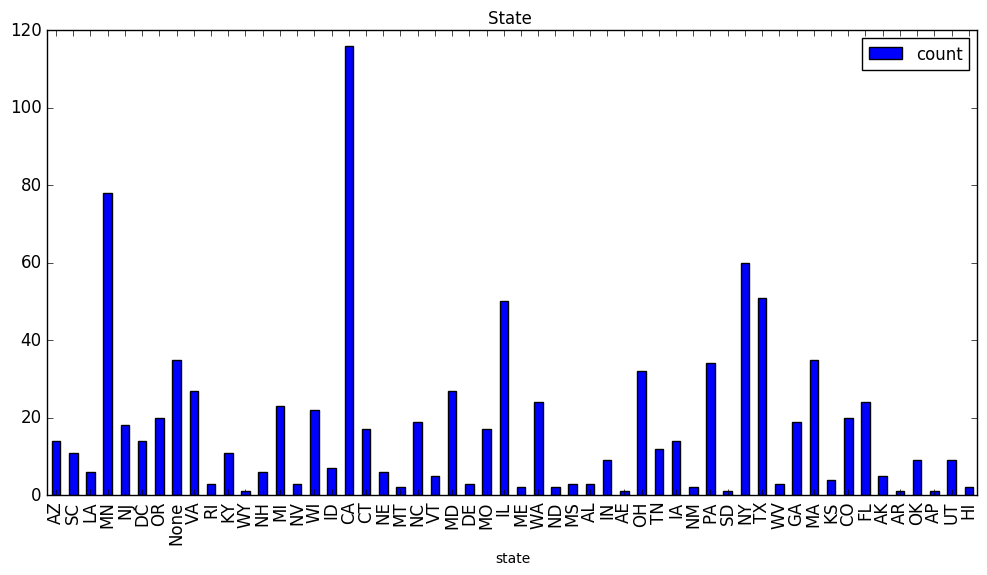

In [78]:
# 劃出長條圖
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
ax = GroupByState_pandas_df ['count'].plot(kind='bar', title ="State ",figsize=(12,6),legend=True, fontsize=12)
plt.show()


In [79]:
# 建立 Occupation_df Dataframe
Occupation_df=sqlContext.sql(""" 
SELECT u.occupation ,count(*) counts
FROM user_table u
GROUP BY occupation
""")
Occupation_df.show(30)

+-------------+------+
|   occupation|counts|
+-------------+------+
|    librarian|    51|
|      retired|    14|
|       lawyer|    12|
|         none|     9|
|       writer|    45|
|   programmer|    66|
|    marketing|    26|
|        other|   105|
|    executive|    32|
|    scientist|    31|
|      student|   196|
|     salesman|    12|
|       artist|    28|
|   technician|    27|
|administrator|    79|
|     engineer|    67|
|   healthcare|    16|
|     educator|    95|
|entertainment|    18|
|    homemaker|     7|
|       doctor|     7|
+-------------+------+



In [80]:
# 查看 Occupation_pandas_df
Occupation_pandas_df =Occupation_df.toPandas().set_index('occupation')
Occupation_pandas_df

,counts
occupation,
librarian,51
retired,14
lawyer,12
none,9
writer,45
programmer,66
marketing,26
other,105
executive,32


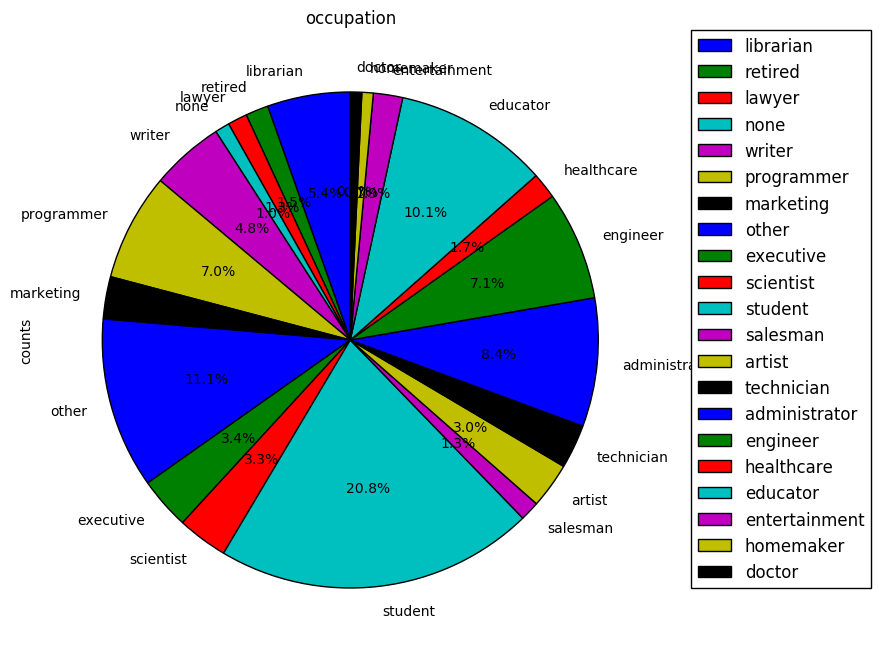

In [81]:
# 依照不同職業統計使用者人數，圓餅圖表示
ax =Occupation_pandas_df['counts'].plot(kind='pie',
           title ="occupation",figsize=(8,8),startangle=90,autopct='%1.1f%%')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()